<h2 align="center">INF575 - Fuzzy Logic</h2>
<h1 align="center">Segmentation of HER2 Overexpression in Histopathology Images with Fuzzy Decision Tree<h1>
    
<center>
    <img src="https://rochepacientes.es/content/dam/roche-pacientes-2/es/assets/images/que-es-her2.jpg" width="60%"/>
</center>

<h2 align="center">Fuzzy Decision Tree</h2>

<center>
<i> Sebastián Bórquez G. - <a href="mailto://sebastian.borquez.g@gmail.com">sebastian.borquez.g@gmail.com</a> - DI UTFSM - August 2020.</i>
</center>

In [2]:
%cd ..

/mnt/d/sebas/Desktop/her2_FL


## Toy Example

In [3]:
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import tree
import pandas as pd
from fuzzy import *
from fuzzy_tree import *

feature_names = load_iris()["feature_names"]
target_names = load_iris()["target_names"]
X, y = load_iris(return_X_y=True)
X, X_test, y, y_test = train_test_split(X,y,test_size=0.1, random_state=42)
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
pd.DataFrame(X).describe()

,0,1,2,3
count,135.000000,135.000000,135.000000,135.000000
mean,5.833333,3.057778,3.790370,1.213333
std,0.833532,0.437166,1.762921,0.760871
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.700000,2.500000


In [5]:
features_fuzzy_sets = {
    'sepal length (cm)': {
        "high":   sigma(6.4, 6.4 - 5.1),
        "medium": triangular(5.8, 5.8 - 5.1, 6.4 - 5.8),
        "low":    sigma_inv(5.1, 6.4 - 5.1)
    },
    'sepal width (cm)': {
        "high":  sigma(3.3, 3.3-2.8),
        "low":   sigma_inv(2.8, 3.3-2.8)
    },
    'petal length (cm)': {
        "high":   sigma(5.1, 5.1 - 1.6),
        "medium": triangular(4.35, 4.35 - 1.6, 5.1 - 4.35),
        "low":    sigma_inv(1.6, 5.1 - 1.6)
    },
     'petal width (cm)': {
        "high":  sigma(1.8, 1.8-0.3),
        "low":   sigma_inv(0.3, 1.8-0.3)
    }
}

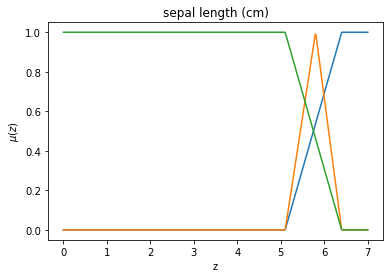

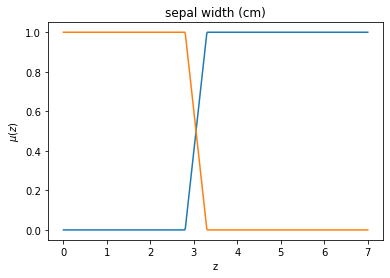

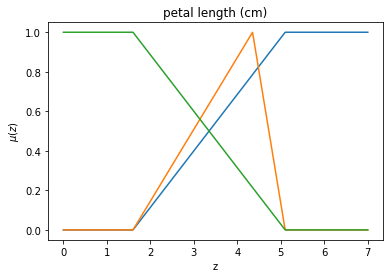

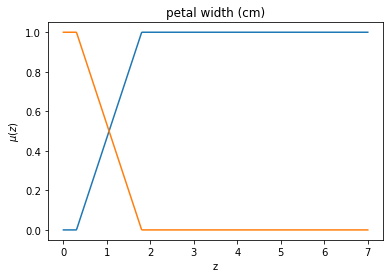

In [6]:
show_membership(features_fuzzy_sets)

In [7]:
tree = build_fuzzy_tree(X, y, feature_names, target_names, features_fuzzy_sets)
show_tree(tree, target_names)

  petal length (cm):
	 [high]-> petal width (cm):
		 [high]-> sepal length (cm):
			 [high]-> sepal width (cm):
				 [high]-> {'setosa': 0.0, 'versicolor': 0.24, 'virginica': 0.76}
				 [low]-> {'setosa': 0.0, 'versicolor': 0.3, 'virginica': 0.7}
			 [medium]-> sepal width (cm):
				 [high]-> {'setosa': 0.0, 'versicolor': 0.61, 'virginica': 0.39}
				 [low]-> {'setosa': 0.0, 'versicolor': 0.49, 'virginica': 0.51}
			 [low]-> sepal width (cm):
				 [high]-> {'setosa': 0.01, 'versicolor': 0.67, 'virginica': 0.33}
				 [low]-> {'setosa': 0.0, 'versicolor': 0.58, 'virginica': 0.42}
		 [low]-> {'setosa': 0.02, 'versicolor': 0.9, 'virginica': 0.08}
	 [medium]-> {'setosa': 0.01, 'versicolor': 0.91, 'virginica': 0.08}
	 [low]-> petal width (cm):
		 [high]-> {'setosa': 0.09, 'versicolor': 0.84, 'virginica': 0.07}
		 [low]-> {'setosa': 0.91, 'versicolor': 0.09, 'virginica': 0.0}


In [8]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0])

In [10]:
y_pred = predict(tree, X_test, features_fuzzy_sets, feature_names, target_names)
print(y_pred)
y_pred_prob = predict_proba(tree, X_test, features_fuzzy_sets, feature_names, target_names)
print(np.round(y_pred_prob,2))

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0]
[[0.03 0.66 0.3 ]
 [0.86 0.14 0.01]
 [0.   0.3  0.7 ]
 [0.02 0.66 0.32]
 [0.03 0.6  0.37]
 [0.86 0.14 0.01]
 [0.08 0.7  0.21]
 [0.   0.27 0.73]
 [0.03 0.66 0.31]
 [0.07 0.69 0.24]
 [0.   0.26 0.74]
 [0.91 0.09 0.  ]
 [0.91 0.09 0.  ]
 [0.91 0.09 0.  ]
 [0.91 0.09 0.  ]]


In [11]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         6
  versicolor       1.00      1.00      1.00         6
   virginica       1.00      1.00      1.00         3

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [14]:
rules = tree_to_rules(tree, target_names)
print(*rules, sep="\n")

IF (("petal length (cm)" IS "high") AND ("petal width (cm)" IS "high") AND ("sepal length (cm)" IS "high") AND ("sepal width (cm)" IS "high")), THEN IS "virginica"
IF (("petal length (cm)" IS "high") AND ("petal width (cm)" IS "high") AND ("sepal length (cm)" IS "high") AND ("sepal width (cm)" IS "low")), THEN IS "virginica"
IF (("petal length (cm)" IS "high") AND ("petal width (cm)" IS "high") AND ("sepal length (cm)" IS "medium") AND ("sepal width (cm)" IS "high")), THEN IS "versicolor"
IF (("petal length (cm)" IS "high") AND ("petal width (cm)" IS "high") AND ("sepal length (cm)" IS "medium") AND ("sepal width (cm)" IS "low")), THEN IS "virginica"
IF (("petal length (cm)" IS "high") AND ("petal width (cm)" IS "high") AND ("sepal length (cm)" IS "low") AND ("sepal width (cm)" IS "high")), THEN IS "versicolor"
IF (("petal length (cm)" IS "high") AND ("petal width (cm)" IS "high") AND ("sepal length (cm)" IS "low") AND ("sepal width (cm)" IS "low")), THEN IS "versicolor"
IF (("petal le